# Car Price Prediction

Aim of this project is to predict Selling Price of Second Hand cars based on various features

### Dataset

https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho


## Life cycle for Data Science Project

1. Data Gathering
2. Exploratory Data Analysis 
3. Feature Engineering 
4. Feature Selection
5. Model Building
6. Model Deployment

------------------


#### Import Libraries

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

### 1. Data Gathering

In [93]:
dataset = pd.read_csv('car data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [94]:
dataset.shape

(301, 9)

### 2.Exploratory Data Analysis

EDA is Done to find out following :
1. Missing values
2. Numerical Variables
3. Distribution of Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between Each Independent and Dependent Feature (Sales Price)

##### 1. Missing Values 

- We will check whether there is any missing value in Dataset 
- Percentage of NAN values in Each Feaure

In [95]:
#There are no missing values in any feature
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [96]:
# Check percentage of Nan values in Each Feature
features_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]

if not features_with_nan:
  print('There are no Missing Values in Any Feature')
else :
  for feature in features_with_nan:
    print(feature ,'  \t ', np.round(dataset[feature].isnull().mean(),4), '% missing values ')

There are no Missing Values in Any Feature


If there were any missing values in any feature , we would find out the relationship between that feature and Selling price.

And if we got any relationship between missing value and Dependent variable we would need to handle the missing values by using various techniques in Feature Engineering

##### Dropping out features which are not usefull

In [97]:
dataset = dataset.drop(['Car_Name'],axis=1)
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### 2.Numerical Variables

It is of Two Types
1. Discrete Random Variable
2. Continous Random Variable

In [98]:
numerical_features = [features for features in dataset.columns if dataset[features].dtypes != 'O' ]

print('Number of Numerical Features' , len(numerical_features),'\n\n')
print(numerical_features,'\n\n')

dataset[numerical_features].head()

Number of Numerical Features 5 


['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'] 




,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


From above Dataframe we can also see Datetime Feature

##### Temporal Variable

In [99]:
year_feature = [feature for feature in dataset.columns if 'Year' in feature or 'Year' in feature]
year_feature

['Year']

### Analyzing Temporal Variabel - Datetime Variable

We will check whether there is any relationship between Year and Selling Price

In [100]:
data = dataset.copy()
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [101]:
data.groupby('Year')['Selling_Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2003,2.0,1.300000,1.343503,0.35,0.8250,1.300,1.7750,2.25
2004,1.0,1.500000,NaN,1.50,1.5000,1.500,1.5000,1.50
2005,4.0,2.487500,1.565469,0.20,2.1125,3.120,3.4950,3.51
2006,4.0,1.437500,1.081184,0.10,0.8125,1.575,2.2000,2.50
2007,2.0,0.160000,0.056569,0.12,0.1400,0.160,0.1800,0.20
2008,7.0,1.002857,1.471753,0.17,0.2000,0.250,1.1000,4.00
2009,6.0,2.816667,1.085664,0.90,2.4375,3.175,3.5375,3.80
2010,15.0,5.262667,8.767003,0.16,0.4850,2.650,5.0000,35.00
2011,19.0,2.375263,1.476977,0.15,0.7750,2.700,2.9750,4.50


In [103]:
dataset.groupby('Year')['Selling_Price'].median()

Year
2003    1.300
2004    1.500
2005    3.120
2006    1.575
2007    0.160
2008    0.250
2009    3.175
2010    2.650
2011    2.700
2012    3.100
2013    3.500
2014    4.450
2015    5.250
2016    5.250
2017    3.500
2018    9.250
Name: Selling_Price, dtype: float64

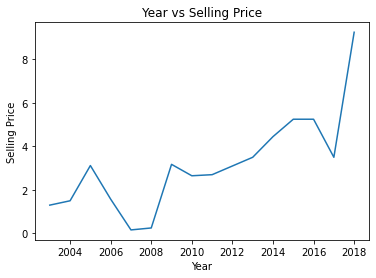

In [105]:
data_featm = dataset.groupby('Year')['Selling_Price'].median()
sns.lineplot(x=data_featm.index, y=data_featm.values)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price')
plt.show()

Selling Price is increasing with every year.

Now we will add One more Feature "Age_of_car" which indicates car age.And then we will see its distribution as well with Selling Price

In [106]:
dataset['Age_of_Car'] = 2021 - dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [107]:
dataset.drop('Year',axis=1,inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Distribution of Age_Of_Car with Selling price

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


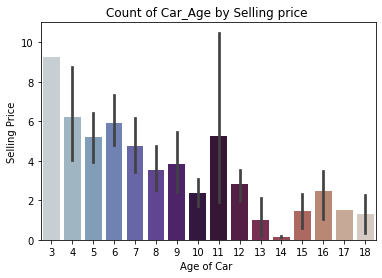

In [108]:
sns.barplot(dataset['Age_of_Car'],dataset['Selling_Price'],palette='twilight')
plt.title('Count of Car_Age by Selling price ')
plt.xlabel('Age of Car ')
plt.ylabel('Selling Price')
plt.show();

From Above Figure , We can say that if the Car Age is Minimum then Selling price is High or else it is low

i-e OLD Cars Cost less than New Cars

#### 1. Discrete Feature

In [109]:
numerical_features.remove('Year')

In [110]:
numerical_features

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [111]:
numerical_features.remove('Selling_Price')
numerical_features

['Present_Price', 'Kms_Driven', 'Owner']

In [112]:
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique())<25]
print('Discrete Value Count : {}'.format(len(discrete_feature)))
discrete_feature

Discrete Value Count : 1


['Owner']

Relationship between Discrete Feature and Selling Price

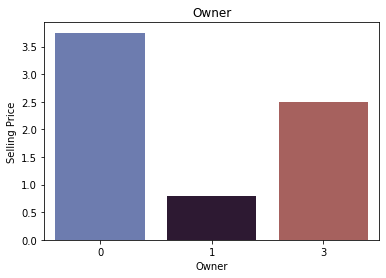

In [113]:
for feature in discrete_feature:
    data = dataset.copy()
    data_feat = data.groupby(feature)['Selling_Price'].median()
    sns.barplot(x=data_feat.index,  y= data_feat.values, palette='twilight')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')
    plt.title(feature)
    plt.show()

#### 2. Continous Feature

In [114]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print('Number of Continous Feature : {}'.format(len(continuous_feature)))
continuous_feature

Number of Continous Feature : 2


['Present_Price', 'Kms_Driven']

In [115]:
dataset['Present_Price'].unique()

array([ 5.59 ,  9.54 ,  9.85 ,  4.15 ,  6.87 ,  9.83 ,  8.12 ,  8.61 ,
        8.89 ,  8.92 ,  3.6  , 10.38 ,  9.94 ,  7.71 ,  7.21 , 10.79 ,
        5.09 ,  7.98 ,  3.95 ,  5.71 ,  8.01 ,  3.46 ,  4.41 ,  4.99 ,
        5.87 ,  6.49 ,  5.98 ,  4.89 ,  7.49 ,  9.95 ,  8.06 ,  7.74 ,
        7.2  ,  2.28 ,  3.76 ,  7.87 ,  3.98 ,  7.15 ,  2.69 , 12.04 ,
        9.29 , 30.61 , 19.77 , 10.21 , 15.04 ,  7.27 , 18.54 ,  6.8  ,
       35.96 , 18.61 ,  7.7  , 36.23 ,  6.95 , 23.15 , 20.45 , 13.74 ,
       20.91 ,  6.76 , 12.48 ,  8.93 , 14.68 , 12.35 , 22.83 , 14.89 ,
        7.85 , 25.39 , 13.46 , 23.73 , 92.6  ,  6.05 , 16.09 , 13.7  ,
       22.78 , 18.64 ,  1.9  ,  1.82 ,  1.78 ,  1.6  ,  1.47 ,  2.37 ,
        3.45 ,  1.5  ,  2.4  ,  1.4  ,  1.26 ,  1.17 ,  1.75 ,  0.95 ,
        0.8  ,  0.87 ,  0.84 ,  0.82 ,  0.81 ,  0.74 ,  1.2  ,  0.787,
        0.99 ,  0.94 ,  0.826,  0.55 ,  0.88 ,  0.51 ,  0.52 ,  0.54 ,
        0.73 ,  0.83 ,  0.64 ,  0.72 ,  1.05 ,  0.57 ,  0.48 ,  0.58 ,
      

#### Distribution of Continuous Feature

Here we will create Histograms for each feature 

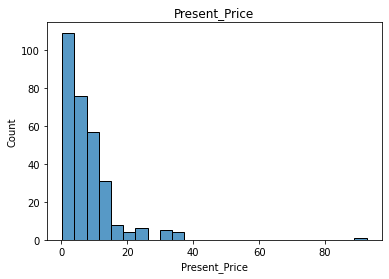

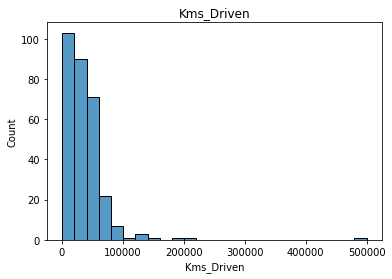

In [116]:
for feature in continuous_feature:
    data =dataset.copy()
    #data[feature].hist(bins=25)
    sns.histplot(x=feature,data=data,bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In above figure , We can see that distribution is Skewed i-e Log Normal Distribution , We will have to do Feature Transformation in Feature Engineering if we dont use any ensemble techniques

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


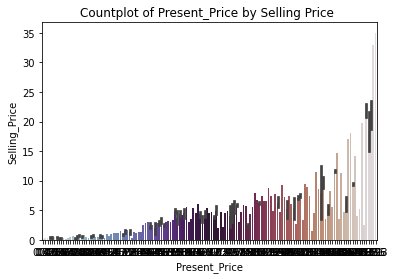

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


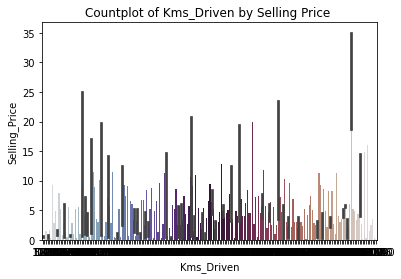

In [117]:
for feature in continuous_feature:
  sns.barplot(dataset[feature],dataset['Selling_Price'],palette='twilight')
  plt.title('Countplot of {} by Selling Price '.format(feature))
  plt.show()

### 4. Categorical Variables

In [118]:
categorical_features = [feature for feature in dataset.columns if data[feature].dtypes=='O']
print(len(categorical_features))
categorical_features

3


['Fuel_Type', 'Seller_Type', 'Transmission']

In [119]:
dataset[categorical_features].head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


### 5. Cardinality of Categorical Feature

How many unique categories does each Cateogrical Feature have?

In [120]:
for feature in categorical_features:
    print('Feature : {} \t Number of Unique Categories : {} '.format(feature,len(dataset[feature].unique())))

Feature : Fuel_Type 	 Number of Unique Categories : 3 
Feature : Seller_Type 	 Number of Unique Categories : 2 
Feature : Transmission 	 Number of Unique Categories : 2 


Since there are less no of Unique Cateogries in each feature we can use One Hot Encoding , If there were many unique cateogires in any of feature , We would have use any other Categorical Encoding Technique

#### 6. Relationship between categorical feature and Selling price

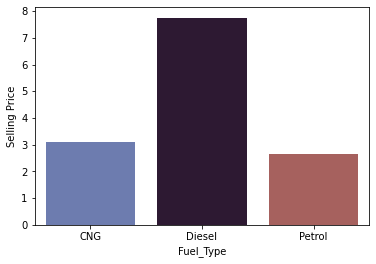

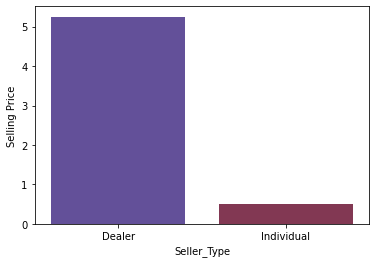

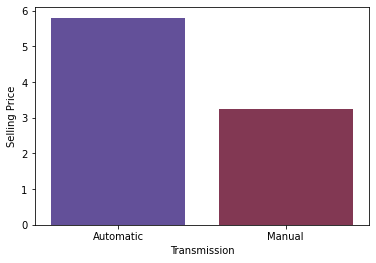

In [121]:
for feature in categorical_features:
    data = dataset.copy()
    data_feat = data.groupby(feature)['Selling_Price'].median()
    sns.barplot(x=data_feat.index,  y= data_feat.values, palette='twilight')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')
    plt.show()

### 7. Outliers

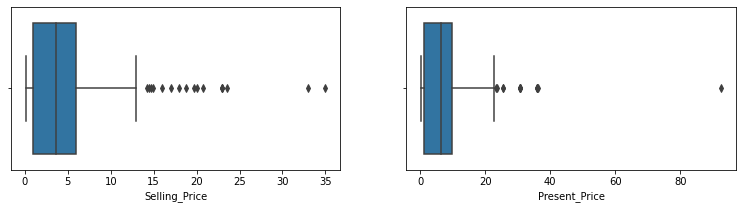

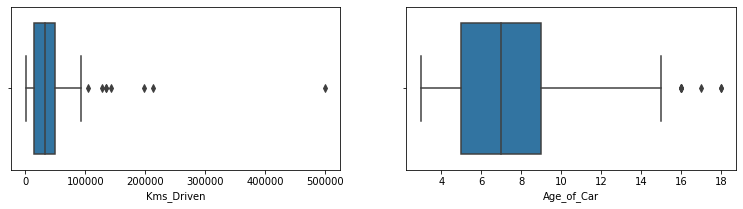

In [124]:
num_cols = ['Selling_Price','Present_Price','Kms_Driven','Age_of_Car']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=dataset)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=dataset)
    i += 1
    
    plt.show()

We will check by viewing the whole row

In [130]:
def find_outlier_in_dataframe(list_of_features):
  for feature in list_of_features:
    print(feature,'\n')
    display(dataset[dataset[feature] > dataset[feature].quantile(0.99)])
    print('\n')

find_outlier_in_dataframe(['Selling_Price','Present_Price','Kms_Driven','Age_of_Car'])

Selling_Price 



,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
63,23.5,35.96,47000,Diesel,Dealer,Automatic,0,6
64,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,35.0,92.60,78000,Diesel,Dealer,Manual,0,11




Present_Price 



,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
64,33.0,36.23,6000,Diesel,Dealer,Automatic,0,4
86,35.0,92.60,78000,Diesel,Dealer,Manual,0,11




Kms_Driven 



,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
84,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
179,0.31,1.05,213000,Petrol,Individual,Manual,0,11
196,0.17,0.52,500000,Petrol,Individual,Automatic,0,13




Age_of_Car 



,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
37,0.35,2.28,127000,Petrol,Individual,Manual,0,18
39,2.25,7.98,62000,Petrol,Dealer,Manual,0,18
77,1.50,12.35,135154,Petrol,Dealer,Automatic,0,17


In [122]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Summary of EDA analysis: how the independent features influence the dependent feature (Selling_Price)

1. Present_Price: as Present_Price increases, Selling_Price increases, even though the increase is kind of steep at the end, overall it shows a linear correlation.
2. Kms_Driven: no correlation was found.
3. Fuel_Type: Car's with diesel is much more expensive than those with Petrol and CNG around 3 times
4. Seller_Type: Car's sold by dealer have higher Selling_Price than the individual sellers by 700% 
5. Transmission: Automatic transmission costs more than Manual more than 2 times! 
6. Owner: Not used cars cost more than those who have owners
7. Car_Age: unsurprisingly, old cars cost less than brand new

There are outliers in "Present price,Selling Price,Kms_Driven,Car_Age.We will have to handle that